In [8]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

boston=load_boston()
X = boston['data']
y = boston['target']
names = boston['feature_names']

In [11]:
# 划分训练集、测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=125)

# 建立线性回归模型
clf =LinearRegression().fit(X_train,y_train)
clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# 预测值
y_pred=clf.predict(X_test)
print(y_pred)

[21.16289134 19.67630366 22.02458756 24.61877465 14.44016461 23.32107187
 16.64386997 14.97085403 33.58043891 17.49079058 25.50429987 36.60653092
 25.95062329 28.49744469 19.35133847 20.17145783 25.97572083 18.26842082
 16.52840639 17.08939063 24.45959064 16.23819126 16.89169905 22.74797943
 25.35583759 12.64365493 28.82435814 10.19011943 25.43180988 25.11535457
 18.64027133 24.4177617  14.33529748 12.14147068 21.53350442 15.54060667
 16.68254685 21.58476991 30.38650776 24.52577119 19.14939896 23.55604006
 27.39103507 14.06551649 36.43371079 24.41224037 12.71076022 32.9030776
 25.15628957 27.74037502 23.64468288 19.52549329  7.02022163 40.56832751
 20.71579835 17.62697062 19.11151851 27.88329596 17.97115821 20.23304646
 38.57646406 39.70288719 22.3394191  20.42986902 21.66068262 21.77108214
 16.89982148 22.4307168  26.14742259 21.1725398   6.11191133  8.53973539
 13.17523608 40.48225492 23.95107971 33.95159267 30.99005711 33.476738
 31.65052232 35.2964409  42.84027722 32.21048157 14.10

In [15]:
import numpy as np
print((np.sum((y_test-y_pred)**2))/len(y_test))


31.15051739031563


In [20]:
# 模型评估
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score

print(explained_variance_score(y_test,y_pred)) # 最优解1
print(mean_absolute_error(y_test,y_pred)) # 最优解0
print(mean_squared_error(y_test,y_pred)) #  最优解0
print(median_absolute_error(y_test,y_pred)) # 最优解0
print(r2_score(y_test,y_pred)) # 最优解1

0.710547565009666
3.3775517360082032
31.15051739031563
1.7788996425420773
0.7068961686076838


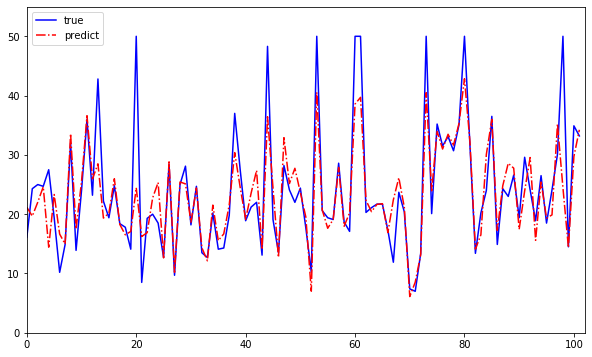

In [22]:
# 回归结果可视化
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.plot(range(y_test.shape[0]),y_test,color='blue',linewidth=1.5,linestyle='-')
plt.plot(range(y_pred.shape[0]),y_pred,color='red',linewidth=1.5,linestyle='-.')

plt.xlim((0,102))
plt.ylim((0,55))
plt.legend(['true','predict'])
plt.show()

In [26]:
# 加利福利亚房价数据
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor # 梯度提升回归模型
from sklearn.model_selection import train_test_split
house = pd.read_csv('./data/cal_housing.data',sep=',')
house_data= house.iloc[:,:-1]
house_target=house.iloc[:,-1]

house_name=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome']
house_train,house_test,house_target_train,house_target_test=train_test_split(house_data,house_target,test_size=0.2,random_state=42)
GBR_house = GradientBoostingRegressor().fit(house_train,house_target_train)
print(GBR_house)

# 预测数据
house_target_pred=GBR_house.predict(house_test)
print(house_target_pred)
print(house_target_test)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
[ 44613.10053869 174259.12183853 176685.14365874 ... 474998.72721559
  80412.92018584 170941.05704025]
20045     47700.0
3024      88300.0
12116    155500.0
20483    218600.0
9814     268000.0
13310    158700.0
7113     218700.0
7668     165700.0
18245    340000.0
5723     500001.0
20068    123200.0
6835     223000.0
11351    156300

In [27]:
# 模型评估
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score

print(explained_variance_score(house_target_test,house_target_pred)) # 最优解1
print(mean_absolute_error(house_target_test,house_target_pred)) # 最优解0
print(mean_squared_error(house_target_test,house_target_pred)) #  最优解0
print(median_absolute_error(house_target_test,house_target_pred)) # 最优解0
print(r2_score(house_target_test,house_target_pred)) # 最优解1

0.7619005663157657
38055.14120724934
3103158196.1725483
26179.47844569829
0.7618531003377986
